$Assignment 1$\
$190639B$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

Question 1


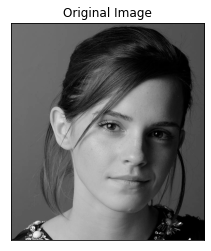

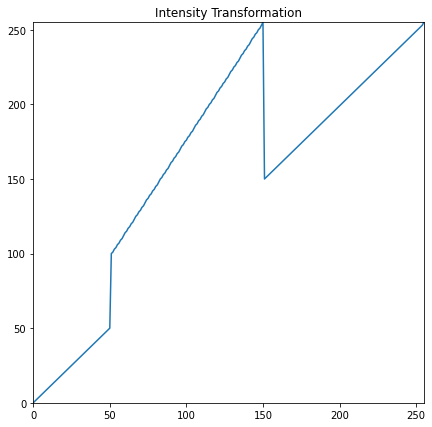

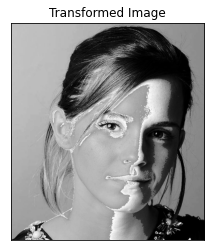

In [56]:
emma_img=cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert emma_img is not None
plt.imshow(emma_img,cmap='gray',vmin=0,vmax=255)
plt.xticks([]),plt.yticks([])
plt.title("Original Image")
plt.show()

t1=np.linspace(0,50,51).astype(np.uint8)
t2=np.linspace(100,255,100).astype(np.uint8)
t3=np.linspace(150,255,105).astype(np.uint8)
t=np.concatenate((t1,t2,t3),axis=0)
assert len(t)==256
new_emma_img=cv.LUT(emma_img,t)
fig,ax=plt.subplots(figsize=(7,7))
ax.plot(t)
ax.set_title("Intensity Transformation")
ax.set_xlim(0,255)
ax.set_ylim(0,255)
plt.show()

plt.imshow(new_emma_img,cmap='gray',vmin=0,vmax=256)
plt.xticks([]),plt.yticks([])
plt.title("Transformed Image")
plt.show()

Question 2(a)

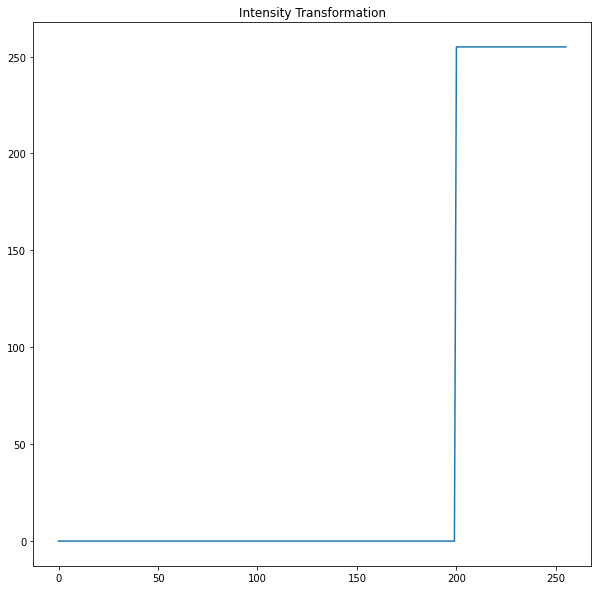

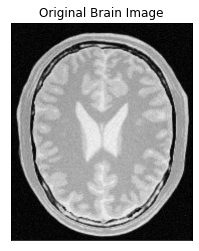

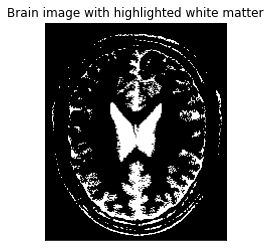

In [57]:
brain_img=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert brain_img is not None
t1=np.array([0 for r in range(0,200)])
t2=np.array([255 for r in range(200,256)])
t=np.concatenate((t1,t2),axis=0)
assert len(t)==256
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(t)
ax.set_title("Intensity Transformation")
plt.show()
new_brain_img=cv.LUT(brain_img,t)
plt.imshow(brain_img,cmap='gray',vmin=0,vmax=255)
plt.title("Original Brain Image")
plt.xticks([]),plt.yticks([])
plt.show()
plt.imshow(new_brain_img,cmap='gray',vmin=0,vmax=255)
plt.xticks([]),plt.yticks([])
plt.title("Brain image with highlighted white matter")
plt.show()

2(b)

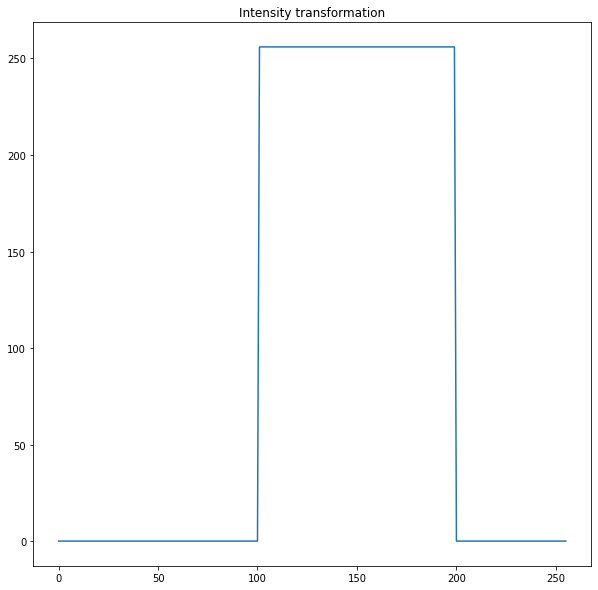

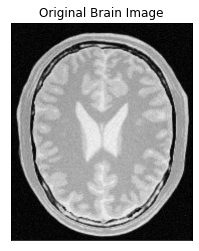

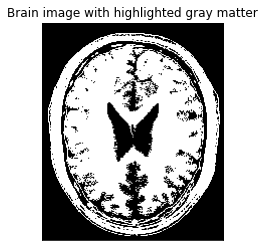

In [58]:
t1=np.array([0 for r in range(0,101)])
t2=np.array([256 for r in range(101,200)])
t3=np.array([0 for r in range(200,256)])
t=np.concatenate((t1,t2,t3),axis=0)
assert len(t)==256
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(t)
ax.set_title("Intensity transformation")
plt.show()
new_brain_img=cv.LUT(brain_img,t)
plt.imshow(brain_img,cmap='gray',vmin=0,vmax=255)
plt.xticks([]),plt.yticks([])
plt.title("Original Brain Image")
plt.show()
plt.imshow(new_brain_img,cmap='gray',vmin=0,vmax=255)
plt.xticks([]),plt.yticks([])
plt.title("Brain image with highlighted gray matter")
plt.show()

Question 3(a)

Used gamma value is 0.3

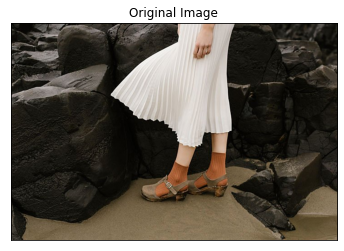

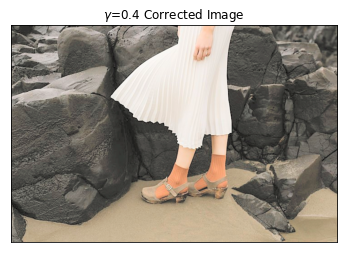

In [59]:
gamma_img=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert gamma_img is not None
LAB_img=cv.cvtColor(gamma_img,cv.COLOR_BGR2LAB)
gamma=0.4
t=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
assert len(t)==256
L,A,B=cv.split(LAB_img)
new_L=cv.LUT(L,t)
new_gamma_img=cv.merge((new_L,A,B))
plt.imshow(cv.cvtColor(gamma_img,cv.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.title('Original Image')
plt.show()
plt.imshow(cv.cvtColor(new_gamma_img,cv.COLOR_LAB2RGB))
plt.xticks([]),plt.yticks([])
plt.title('${\gamma}$=0.4 Corrected Image')
plt.show()

3(b)


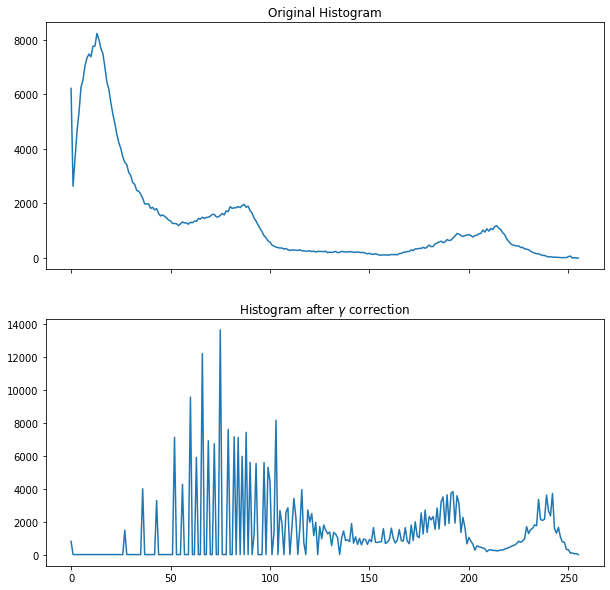

In [60]:
hist_gamma_img=cv.calcHist([gamma_img],[0],None,[256],[0,255])
hist_new_gamma=cv.calcHist([new_gamma_img],[0],None,[256],[0,255])
fig,ax=plt.subplots(2,1,sharex=True,figsize=(10,10))
ax[0].plot(hist_gamma_img)
ax[0].set_title("Original Histogram")
ax[1].plot(hist_new_gamma)
ax[1].set_title("Histogram after ${\gamma}$ correction")
plt.show()

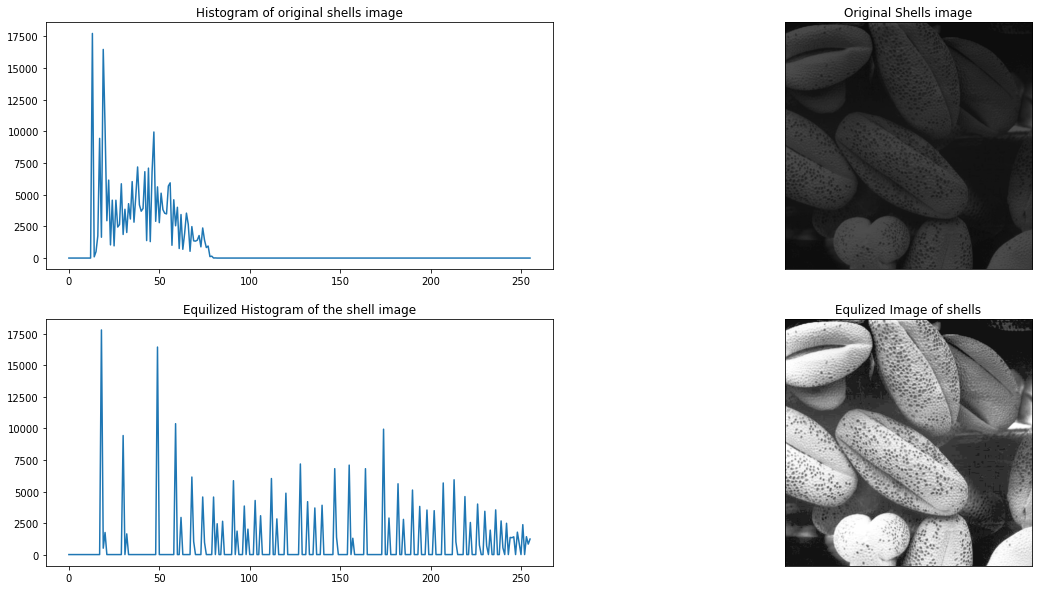

In [92]:
shell_img=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
assert shell_img is not None
arrayOfNumberOfResalutionPoints=np.zeros((1,256))
for r in range(0,256):
    arrayOfNumberOfResalutionPoints[0][r]=np.count_nonzero(shell_img==r)
fig,axes=plt.subplots(2,2,figsize=(20,10))

number_of_rows,number_of_coloumns=shell_img.shape

axes[0][0].plot(arrayOfNumberOfResalutionPoints[0])
axes[0][0].set_title("Histogram of original shells image")

axes[0][1].imshow(shell_img,cmap='gray',vmin=0,vmax=255)
axes[0][1].set_title("Original Shells image")
axes[0][1].set_xticks([])
axes[0][1].set_yticks([])

equilized_values_of_histogram=np.zeros((1,256))

for r in range(0,256):
    s=(255/(number_of_coloumns*number_of_rows))*np.sum(arrayOfNumberOfResalutionPoints[:,:r+1])
    equilized_values_of_histogram[0][r]=round(s)
new_hist_equilized_img=cv.LUT(shell_img,equilized_values_of_histogram)

arrayOfNumberOfResalutionPoints_ofNewEquilizedImg=np.zeros((1,256))
for r in range(0,256):
    arrayOfNumberOfResalutionPoints_ofNewEquilizedImg[0][r]=np.count_nonzero(new_hist_equilized_img==r)

axes[1][0].plot(arrayOfNumberOfResalutionPoints_ofNewEquilizedImg[0])
axes[1][0].set_title("Equilized Histogram of the shell image")
axes[1][1].imshow(new_hist_equilized_img,cmap='gray',vmin=0,vmax=255)
axes[1][1].set_title("Equlized Image of shells")
axes[1][1].set_xticks([])
axes[1][1].set_yticks([])

plt.show()